In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
#Create DataFrames
df_1 = pd.read_csv("../Data_csv/diabetes.csv")
df_2 = pd.read_csv("../Data_csv/Diabetes_Classification.csv")

In [3]:
# Rename Columns
df_1.rename(columns={'chol':'Cholesterol', 'stab.glu':'Glucose','hdl': 'HDL Chol', 'age':'Age','gender':'Gender','height':'Height', 'weight':'Weight', 'bp.1s':'Systolic BP','bp.1d':'Diastolic BP', 'ratio':'chol/HDL ratio', 'glyhb':'A1c'}, inplace=True)
df_2.rename(columns={'chol':'Cholesterol', 'stab.glu':'Glucose','hdl': 'HDL Chol', 'age':'Age','gender':'Gender','height':'Height', 'weight':'Weight', 'bp.1s':'Systolic BP','bp.1d':'Diastolic BP'}, inplace=True)

In [4]:
df_1.head()

,id,Cholesterol,Glucose,HDL Chol,chol/HDL ratio,A1c,location,Age,Gender,Height,Weight,frame,Systolic BP,Diastolic BP,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [5]:
# Create Diabetes row from glyhb being over 6.5
df_1['Diabetes'] = np.where(df_1['A1c'] >= 6.5, 'Diabetes', 'No diabetes')


In [6]:
# imputation for a1c conversion from single glucose instance
df_2['A1c'] =  round((46.7 + df_2['Glucose']) /28.7,2)


In [7]:
# Dropping unusable columns
df_1 = df_1[['Cholesterol',	'Glucose', 'HDL Chol', 'Age','Gender', 'Height','Weight', 'Systolic BP','Diastolic BP','waist', 'hip', 'bp.2s', 'bp.2d', 'Diabetes', 'A1c' ]]
df_2 = df_2[['Cholesterol',	'Glucose', 'HDL Chol', 'Age','Gender', 'Height','Weight', 'Systolic BP','Diastolic BP','waist', 'hip', 'Diabetes','A1c']]

In [8]:
# merged df with nans
df_merged = pd.concat([df_1, df_2], axis=0)

In [9]:
#create BMI column and waist/hip column
df_merged['BMI'] = round((df_merged['Weight']/(df_merged['Height']*df_merged['Height']))*703,2)
df_merged['waist/hip ratio'] = round(df_merged['waist']/df_merged['hip'],2)

In [10]:
df_merged['bp.2s'] = np.where(~df_merged['bp.2s'].isna(),df_merged['bp.2s'],df_merged['Systolic BP'])
df_merged['bp.2d'] = np.where(~df_merged['bp.2d'].isna(),df_merged['bp.2d'],df_merged['Diastolic BP'])
df_merged.head(10)

,Cholesterol,Glucose,HDL Chol,Age,Gender,Height,Weight,Systolic BP,Diastolic BP,waist,hip,bp.2s,bp.2d,Diabetes,A1c,BMI,waist/hip ratio
0,203.0,82,56.0,46,female,62.0,121.0,118.0,59.0,29.0,38.0,118.0,59.0,No diabetes,4.31,22.13,0.76
1,165.0,97,24.0,29,female,64.0,218.0,112.0,68.0,46.0,48.0,112.0,68.0,No diabetes,4.44,37.42,0.96
2,228.0,92,37.0,58,female,61.0,256.0,190.0,92.0,49.0,57.0,185.0,92.0,No diabetes,4.64,48.37,0.86
3,78.0,93,12.0,67,male,67.0,119.0,110.0,50.0,33.0,38.0,110.0,50.0,No diabetes,4.63,18.64,0.87
4,249.0,90,28.0,64,male,68.0,183.0,138.0,80.0,44.0,41.0,138.0,80.0,Diabetes,7.72,27.82,1.07
5,248.0,94,69.0,34,male,71.0,190.0,132.0,86.0,36.0,42.0,132.0,86.0,No diabetes,4.81,26.50,0.86
6,195.0,92,41.0,30,male,69.0,191.0,161.0,112.0,46.0,49.0,161.0,112.0,No diabetes,4.84,28.20,0.94
7,227.0,75,44.0,37,male,59.0,170.0,NaN,NaN,34.0,39.0,NaN,NaN,No diabetes,3.94,34.33,0.87
8,177.0,87,49.0,45,male,69.0,166.0,160.0,80.0,34.0,40.0,128.0,86.0,No diabetes,4.84,24.51,0.85
9,263.0,89,40.0,55,female,63.0,202.0,108.0,72.0,45.0,50.0,108.0,72.0,No diabetes,5.78,35.78,0.90


In [11]:
#drop nans, round A1c column. save csv to upload to postgresSQL, and read in intitial data for eval
df_clean = df_merged.dropna()
df_clean['A1c'] = round(df_clean['A1c'],2)
df_clean.to_csv('../Data_csv/cleaned_data.csv')
inital_dataset = pd.read_csv("../Data_csv/initial_dataset.csv")

In [12]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Cholesterol,767.0,207.481095,44.625677,78.00,179.00,204.00,230.00,443.00
Glucose,767.0,107.427640,53.843208,48.00,81.00,90.00,108.00,385.00
HDL Chol,767.0,50.335072,17.334706,12.00,38.00,46.00,59.00,120.00
Age,767.0,46.846154,16.524681,19.00,34.00,45.00,60.00,92.00
Height,767.0,65.980443,3.912340,52.00,63.00,66.00,69.00,76.00
Weight,767.0,177.697523,40.427736,99.00,151.00,174.00,200.00,325.00
Systolic BP,767.0,137.262060,22.979112,90.00,122.00,136.00,148.00,250.00
Diastolic BP,767.0,83.358540,13.504201,48.00,75.00,82.00,90.00,124.00
waist,767.0,37.912647,5.757858,26.00,33.00,37.00,41.00,56.00
hip,767.0,43.036506,5.644029,30.00,39.00,42.00,46.00,64.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A19686A788>,
      dtype=object)

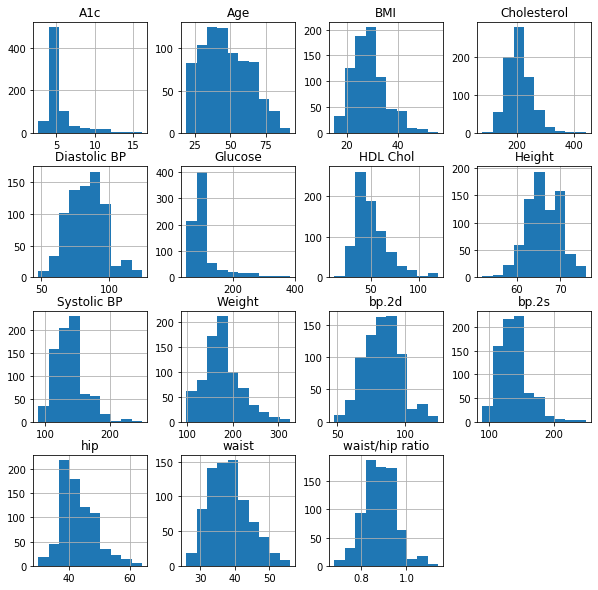

In [13]:
df_clean.hist(figsize = (10,10))

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.pairplot(df_clean, hue = 'Diabetes')
#check image


In [15]:
# df_clean = pd.get_dummies(df_clean, columns=['Gender','Diabetes'])
# df_clean.head()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Assign X (data) and y (target)
X = df_clean[[ 'Height','BMI', 'A1c', 'HDL Chol', 'Glucose','Cholesterol']]
y = df_clean["Diabetes"]#.values.reshape(-1, 1)
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42,stratify=y)





In [17]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [18]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [19]:
# train-test split evaluation random forest
model = RandomForestClassifier(random_state=1)
model.fit(X_train_scaled,y_train)
yhat = model.predict(X_test_scaled)
acc = accuracy_score(y_test,yhat)

print('Accuracy: %.3f' % acc)
#Testing model against fake data
new_input = np.array([69, 25, 7.0, 30, 150, 200])
new_output = model.predict(new_input.reshape(1,-1))
print("Fake Data Test: " , new_input, new_output)

Accuracy: 0.948
Fake Data Test:  [ 69.  25.   7.  30. 150. 200.] ['Diabetes']


In [20]:
#logistical regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.960820895522388
Testing Data Score: 0.948051948051948


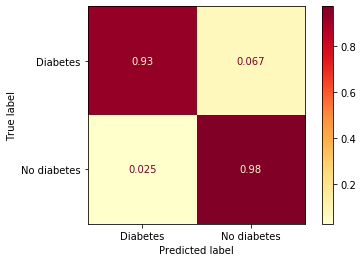

In [41]:
#confusion matrix 28 TP, 2 FP, 4 FN, 158 TN 
# we would want as low of FN as possible
from collections import Counter
from sklearn.metrics import precision_recall_curve, plot_confusion_matrix, roc_curve, roc_auc_score, f1_score, auc
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

p = plot_confusion_matrix(model, X_test, y_test,
                      cmap=plt.cm.YlOrRd,
                      normalize='true')

plt.savefig('../statistic_img/confusion_matrix.png')

In [23]:
y_dummie_test = pd.get_dummies(y_test, columns=['Diabetes'])
y_dummie_test

,Diabetes,No diabetes
304,0,1
111,0,1
204,0,1
375,0,1
255,1,0
...,...,...
265,0,1
204,0,1
151,0,1
141,0,1


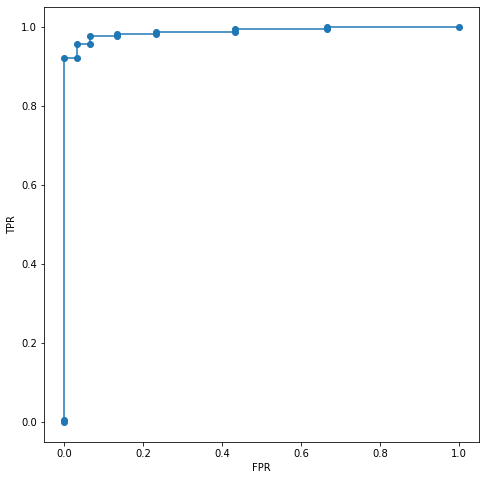

In [24]:
probs = model.predict_proba(X_test)[:, 1] # column 1 to look at TPR/FPR
fpr, tpr, _ = roc_curve(list(y_dummie_test['No diabetes']), probs)

_, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal', 'box')
plt.xlabel('FPR')
plt.ylabel('TPR')
p = ax.plot(fpr, tpr, marker='o')

In [25]:
roc_auc_score(y_test, probs)

0.988477366255144

In [26]:
precision, recall, thresholds = precision_recall_curve(list(y_dummie_test['No diabetes']), probs)
auc(recall, precision)

0.997970015109429

In [27]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
print('Test Acc: %.3f' % model_svc.score(X_test, y_test))

# param_grid = {'C': [1,3,7,11],
#               'gamma': [0.0001, 0.0002, 0.0006, 0.001, 0.004]}
# grid = GridSearchCV(model_svc, param_grid, verbose=3)
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)

Test Acc: 0.969
